## Problem Statement:
To predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

Also to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

## Table of Contents:

  1. [Import Libraries and setup environment](#Import)
  2. [Read csv data file and create Dataframe](#ReadData)
  3. [Check dataframe size and basic data quality](#DataChecks)
  4. [Find Churned Customers](#ExploreData)
  5. [Derived Columns & Removal of redundand variables](#Derived)
  6. [Data Imputation](#Imputation)
  7. [Outlier Handling](#Outlier)
  8. [Handling Data Imbalance and splitting Train/Test Data](#Imbalance)
  9. [PCA](#PCA)
  10. [Implementing Models](#Implement)
   1. [Bagging Model](#Bag)
   2. [BalancedBagging with parameter tunning](#BagTune)
   3. [Ensamble voting Model](#Vote)
   4. [Decision Tree Model](#DecTree)
   5. [Random Forest Model](#RF)
   6. [XGBoosting Model](#XG)
   7. [XGBoosting Model with Tuned Parameters](#XGtune)
  11. [Feature  reduction using lasso](#FeatureSelection)
  12. [Summary](#Summary)


<a id='Import'></a>
## Import Libraries and setup environment

In [1]:
#Importing basic libraries
import pandas as pd
import numpy as np
import re
import statistics


#Import libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#import pandas profiling for visualize all data
#!pip install pandas-profiling
import pandas_profiling as pp

#import preprocessing for standardscalar
from sklearn.preprocessing import StandardScaler

#Import Train test Split
from sklearn.model_selection import train_test_split


#Import SMOTE for handling data imbalance
#!pip install imblearn
from imblearn.over_sampling import SMOTE 

#lets import libraries required for decision tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
#Import Balanced Bagging Classifier
from imblearn.ensemble import BalancedBaggingClassifier


#Lets import XGboost classifier

from xgboost import XGBClassifier
import xgboost as xgb

#Import GridSearchCV
from sklearn.model_selection import GridSearchCV

#import lasso for feature selection

from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso, LassoCV
from sklearn.feature_selection import RFE


ModuleNotFoundError: No module named 'imblearn'

In [0]:
#Setup the display options so that all the columns are displayed on the screen

pd.options.display.max_columns = 400

In [0]:
# Create a class color for setting print formatting
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


<a id='ReadData'></a>
## Read csv data file and create Dataframe

In [0]:
#lets read the csv data and create a dataframe
#df = pd.read_csv('/content/drive/My Drive/Telecom Churn - ML Group Case Study/telecom_churn_data.csv')
df = pd.read_csv('telecom_churn_data.csv')

<a id='DataChecks'></a>
## Check dataframe size and basic data quality

In [553]:
# Display shape of the dataframe


print(color.BOLD+color.DARKCYAN+'Shape of the dataframe df : {}'.format(df.shape) +color.END)

Shape of the dataframe df : (99999, 226)


In [554]:
#lets display data
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [555]:
# Data type of columns
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [556]:
#Describe data to look at numeric value statistics of the variables
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [0]:
#lets do data profiling to analyse data in one go
#pp.ProfileReport(df)

In [0]:
#df[~df['count_rech_2g_6'].isnull()].head()

In [0]:
#Derived column 'Total_Reacharge_Good_Phase'
df['Total_Reacharge_Good_Phase'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

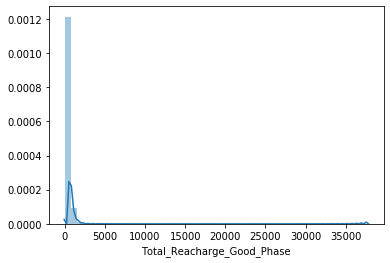

In [560]:
sns.distplot(df['Total_Reacharge_Good_Phase'])
plt.show()

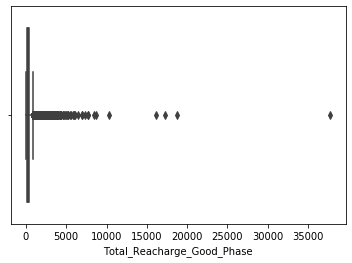

In [561]:
#lets boxplot Total_Reacharge_Good_Phase to visualize avg. recharge value in Good Phase
sns.boxplot(df['Total_Reacharge_Good_Phase'])
plt.show()

In [562]:
#print the Avg. recharge done by High Value customers
print(color.BOLD+color.DARKCYAN+'High Value customers done Monthly avg. reachrge over : {} INR'.format(df['Total_Reacharge_Good_Phase'].quantile(0.70)) +color.END)

High Value customers done Monthly avg. reachrge over : 368.5 INR


In [0]:
#Create a dataframe with high value customers
df_high_val_cust = df[df['Total_Reacharge_Good_Phase'] > df['Total_Reacharge_Good_Phase'].quantile(0.70)].copy()

In [564]:
#High value customer records %
print(color.BOLD+color.DARKCYAN+'% High value customer records : {} %'.format(round(100*df_high_val_cust.shape[0]/df.shape[0],2)) +color.END)

% High value customer records : 29.98 %


<a id='ExploreData'></a>
## Find Churned Customers

**We need to find churned customers in churn phase which will have values  (churn=1, else 0) **

1. Remove all churn phase columns prefixed with 9 as no use in analysis


In [0]:
#df_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]
#df_high_val_cust[(df_high_val_cust['total_ic_mou_9'] ==0) & (df_high_val_cust['total_og_mou_9'] ==0) & (df_high_val_cust['vol_2g_mb_9'] ==0) & (df_high_val_cust['vol_3g_mb_9'] ==0 )]

df_high_val_cust['Churned'] = np.where((df_high_val_cust['total_ic_mou_9'] ==0) & (df_high_val_cust['total_og_mou_9'] ==0) & (df_high_val_cust['vol_2g_mb_9'] ==0) & (df_high_val_cust['vol_3g_mb_9'] ==0 ),1,0)
                 

In [566]:
df_high_val_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_Reacharge_Good_Phase,Churned
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.8

In [0]:
#Lets find columns for churn phase and we will need to drop these columns as they dont serve any purpose for our analysis
churn_col_list = [col for col in list(df_high_val_cust.columns) if '_9' in col]
df_high_val_cust.drop(churn_col_list, axis = 1, inplace = True)
#we will also drop sep_vbc_3g column as its not needed
df_high_val_cust.drop('sep_vbc_3g', axis = 1, inplace = True)

In [568]:
# Display shape of the dataframe

print(color.BOLD+color.DARKCYAN+'Shape of the dataframe df : {}'.format(df_high_val_cust.shape) +color.END)

Shape of the dataframe df : (29979, 173)


In [569]:
df_high_val_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Total_Reacharge_Good_Phase,Churned
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0

In [570]:
#drop all columns with one one value which is not useful
for col in  list(df_high_val_cust.columns):
  if len(list(df_high_val_cust[col].fillna(df_high_val_cust[col].mode()[0]).unique())) == 1:
    print(color.BOLD+color.DARKCYAN+'Dropped column due to unique value: {} '.format(col) +color.END)
    df_high_val_cust.drop(col, axis = 1, inplace = True)


Dropped column due to unique value: circle_id 
Dropped column due to unique value: loc_og_t2o_mou 
Dropped column due to unique value: std_og_t2o_mou 
Dropped column due to unique value: loc_ic_t2o_mou 
Dropped column due to unique value: last_date_of_month_6 
Dropped column due to unique value: last_date_of_month_7 
Dropped column due to unique value: last_date_of_month_8 
Dropped column due to unique value: std_og_t2c_mou_6 
Dropped column due to unique value: std_og_t2c_mou_7 
Dropped column due to unique value: std_og_t2c_mou_8 
Dropped column due to unique value: std_ic_t2o_mou_6 
Dropped column due to unique value: std_ic_t2o_mou_7 
Dropped column due to unique value: std_ic_t2o_mou_8 


In [571]:
df_high_val_cust.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Total_Reacharge_Good_Phase,Churned
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,NaN,7/31/2014,8/23/2014,NaN,2.0,3.0,NaN,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,NaN,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,NaN,0.0,19.83,NaN,0.0,0.0,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,NaN,1.0,1.0,315,21.03,910.

<a id='Derived'></a>
## Derived Columns & Removal of redundand variables

In [0]:
#We will derive the arpu for users from the data usage as combined value of 2G and 3G revenue
df_high_val_cust['arpu_data_6']=df_high_val_cust['arpu_3g_6']+df_high_val_cust['arpu_2g_6']
df_high_val_cust['arpu_data_7']=df_high_val_cust['arpu_3g_7']+df_high_val_cust['arpu_2g_7']
df_high_val_cust['arpu_data_8']=df_high_val_cust['arpu_3g_8']+df_high_val_cust['arpu_2g_8']

#We will drop the original columns
data_arpu_columns = [col for col in list(df_high_val_cust.columns) if re.search(r"arpu_[2-3]g", col)]
df_high_val_cust.drop(data_arpu_columns, axis = 1, inplace = True)

In [0]:
#We will derive the monthly data packs for users  as combined value of 2G and 3G monthly pack
df_high_val_cust['monthly_data_6']=df_high_val_cust['monthly_2g_6']+df_high_val_cust['monthly_3g_6']
df_high_val_cust['monthly_data_7']=df_high_val_cust['monthly_2g_7']+df_high_val_cust['monthly_3g_7']
df_high_val_cust['monthly_data_8']=df_high_val_cust['monthly_2g_8']+df_high_val_cust['monthly_3g_8']

#We will drop the original columns
data_monthly_columns = [col for col in list(df_high_val_cust.columns) if re.search(r"monthly_[2-3]g", col)]
df_high_val_cust.drop(data_monthly_columns, axis = 1, inplace = True)

In [0]:
#We will derive the sachet data packs for users  as combined value of 2G and 3G sachets
df_high_val_cust['sachet_data_6']=df_high_val_cust['sachet_2g_6']+df_high_val_cust['sachet_3g_6']
df_high_val_cust['sachet_data_7']=df_high_val_cust['sachet_2g_7']+df_high_val_cust['sachet_3g_7']
df_high_val_cust['sachet_data_8']=df_high_val_cust['sachet_2g_8']+df_high_val_cust['sachet_3g_8']

#We will drop the original columns
data_sachet_columns = [col for col in list(df_high_val_cust.columns) if re.search(r"sachet_[2-3]g", col)]
df_high_val_cust.drop(data_sachet_columns, axis = 1, inplace = True)

In [0]:
#We will derive the  data consumed by the users  as combined value of 2G and 3G valumns
df_high_val_cust['vol_data_mb_6']=df_high_val_cust['vol_2g_mb_6']+df_high_val_cust['vol_3g_mb_6']
df_high_val_cust['vol_data_mb_7']=df_high_val_cust['vol_2g_mb_7']+df_high_val_cust['vol_3g_mb_7']
df_high_val_cust['vol_data_mb_8']=df_high_val_cust['vol_2g_mb_8']+df_high_val_cust['vol_3g_mb_8']

#We will drop the original columns
vol_data_mb_columns = [col for col in list(df_high_val_cust.columns) if re.search(r"vol_[2-3]g_mb", col)]
df_high_val_cust.drop(vol_data_mb_columns, axis = 1, inplace = True)

In [0]:
#We will derive the  data recharge counts by the users  as combined value of 2G and 3G recharges
df_high_val_cust['count_rech_data_6']=df_high_val_cust['count_rech_2g_6']+df_high_val_cust['count_rech_3g_6']
df_high_val_cust['count_rech_data_7']=df_high_val_cust['count_rech_2g_7']+df_high_val_cust['count_rech_3g_7']
df_high_val_cust['count_rech_data_8']=df_high_val_cust['count_rech_2g_8']+df_high_val_cust['count_rech_3g_8']
#We will drop the original columns
count_rech_data_columns = [col for col in list(df_high_val_cust.columns) if re.search(r"count_rech_[2-3]g", col)]
df_high_val_cust.drop(count_rech_data_columns, axis = 1, inplace = True)

# we will compare existing columns with newly generated columns
df_high_val_cust[df_high_val_cust['total_rech_data_6'].fillna(0) != df_high_val_cust['count_rech_data_6'].fillna(0)][['total_rech_data_6','count_rech_data_6']]
df_high_val_cust[df_high_val_cust['total_rech_data_7'].fillna(0) != df_high_val_cust['count_rech_data_7'].fillna(0)][['total_rech_data_7','count_rech_data_7']]
df_high_val_cust[df_high_val_cust['total_rech_data_8'].fillna(0) != df_high_val_cust['count_rech_data_8'].fillna(0)][['total_rech_data_8','count_rech_data_8']]
#as the newly generated columns are exactly same  as existing summary columns we will drop them
df_high_val_cust.drop(['count_rech_data_6','count_rech_data_7','count_rech_data_8'], axis = 1, inplace = True)

In [0]:
#We will derive the  std outgoing usage by the users  as combined value of t2t, t2m and t2f calls
df_high_val_cust['std_og_6']=df_high_val_cust['std_og_t2t_mou_6']+df_high_val_cust['std_og_t2m_mou_6']+df_high_val_cust['std_og_t2f_mou_6']
df_high_val_cust['std_og_7']=df_high_val_cust['std_og_t2t_mou_7']+df_high_val_cust['std_og_t2m_mou_7']+df_high_val_cust['std_og_t2f_mou_7']
df_high_val_cust['std_og_8']=df_high_val_cust['std_og_t2t_mou_8']+df_high_val_cust['std_og_t2m_mou_8']+df_high_val_cust['std_og_t2f_mou_8']
#We will drop the original columns
std_og_columns = [col for col in list(df_high_val_cust.columns) if re.search(r"std_og_t2", col)]
df_high_val_cust.drop(std_og_columns, axis = 1, inplace = True)

#column std_og_mou_* sums the corresponding monthly STD usage column, so will drop the STD usage columns and keep std_og_mou_*
df_high_val_cust[df_high_val_cust['std_og_6'].fillna(0).apply(np.floor) != df_high_val_cust['std_og_mou_6'].fillna(0).apply(np.floor)][['std_og_6','std_og_mou_6']]
df_high_val_cust[df_high_val_cust['std_og_7'].fillna(0).apply(np.floor) != df_high_val_cust['std_og_mou_7'].fillna(0).apply(np.floor)][['std_og_7','std_og_mou_7']]
df_high_val_cust[df_high_val_cust['std_og_8'].fillna(0).apply(np.floor) != df_high_val_cust['std_og_mou_8'].fillna(0).apply(np.floor)][['std_og_8','std_og_mou_8']]

#as the newly generated columns are exactly same as existing summary columns we will drop them
df_high_val_cust.drop(['std_og_6','std_og_7','std_og_8'], axis = 1, inplace = True)

In [0]:
#We will derive the  std incoming usage by the users  as combined value of t2t, t2m and t2f calls
df_high_val_cust['std_ic_6']=df_high_val_cust['std_ic_t2t_mou_6']+df_high_val_cust['std_ic_t2m_mou_6']+df_high_val_cust['std_ic_t2f_mou_6']
df_high_val_cust['std_ic_7']=df_high_val_cust['std_ic_t2t_mou_7']+df_high_val_cust['std_ic_t2m_mou_7']+df_high_val_cust['std_ic_t2f_mou_7']
df_high_val_cust['std_ic_8']=df_high_val_cust['std_ic_t2t_mou_8']+df_high_val_cust['std_ic_t2m_mou_8']+df_high_val_cust['std_ic_t2f_mou_8']
#We will drop the original columns
std_ic_columns = [col for col in list(df_high_val_cust.columns) if re.search(r"std_ic_t2", col)]
df_high_val_cust.drop(std_ic_columns, axis = 1, inplace = True)

#column std_ic_mou_* sums the corresponding monthly STD usage column, so will drop the STD usage columns and keep std_ic_mou_*
df_high_val_cust[df_high_val_cust['std_ic_6'].fillna(0).apply(np.floor) != df_high_val_cust['std_ic_mou_6'].fillna(0).apply(np.floor)][['std_ic_6','std_ic_mou_6']]
df_high_val_cust[df_high_val_cust['std_ic_7'].fillna(0).apply(np.floor) != df_high_val_cust['std_ic_mou_7'].fillna(0).apply(np.floor)][['std_ic_7','std_ic_mou_7']]
df_high_val_cust[df_high_val_cust['std_ic_8'].fillna(0).apply(np.floor) != df_high_val_cust['std_ic_mou_8'].fillna(0).apply(np.floor)][['std_ic_8','std_ic_mou_8']]

#as the newly generated columns are exactly same as existing summary columns we will drop them
df_high_val_cust.drop(['std_ic_6','std_ic_7','std_ic_8'], axis = 1, inplace = True)

In [0]:
#We will derive the  local outgoing call usage by the users  as combined value of t2t, t2m and t2f calls
df_high_val_cust['loc_og_6']=df_high_val_cust['loc_og_t2t_mou_6']+df_high_val_cust['loc_og_t2m_mou_6']+df_high_val_cust['loc_og_t2f_mou_6']
df_high_val_cust['loc_og_7']=df_high_val_cust['loc_og_t2t_mou_7']+df_high_val_cust['loc_og_t2m_mou_7']+df_high_val_cust['loc_og_t2f_mou_7']
df_high_val_cust['loc_og_8']=df_high_val_cust['loc_og_t2t_mou_8']+df_high_val_cust['loc_og_t2m_mou_8']+df_high_val_cust['loc_og_t2f_mou_8']
#We will drop the original columns
loc_og_columns = [col for col in list(df_high_val_cust.columns) if re.search(r"loc_og_t2[tmf]", col)]
df_high_val_cust.drop(loc_og_columns, axis = 1, inplace = True)

#column loc_og_mou_* sums the corresponding monthly Local usage column, so will drop the Local usage columns and keep loc_og_mou_*
df_high_val_cust[df_high_val_cust['loc_og_6'].fillna(0).apply(np.floor) != df_high_val_cust['loc_og_mou_6'].fillna(0).apply(np.floor)][['loc_og_6','loc_og_mou_6']]
df_high_val_cust[df_high_val_cust['loc_og_7'].fillna(0).apply(np.floor) != df_high_val_cust['loc_og_mou_7'].fillna(0).apply(np.floor)][['loc_og_7','loc_og_mou_7']]
df_high_val_cust[df_high_val_cust['loc_og_8'].fillna(0).apply(np.floor) != df_high_val_cust['loc_og_mou_8'].fillna(0).apply(np.floor)][['loc_og_8','loc_og_mou_8']]

#as the newly generated columns are exactly same as existing summary columns we will drop them
df_high_val_cust.drop(['loc_og_6','loc_og_7','loc_og_8'], axis = 1, inplace = True)

In [0]:
#We will derive the  local incoming call usage by the users  as combined value of t2t, t2m and t2f calls
df_high_val_cust['loc_ic_6']=df_high_val_cust['loc_ic_t2t_mou_6']+df_high_val_cust['loc_ic_t2m_mou_6']+df_high_val_cust['loc_ic_t2f_mou_6']
df_high_val_cust['loc_ic_7']=df_high_val_cust['loc_ic_t2t_mou_7']+df_high_val_cust['loc_ic_t2m_mou_7']+df_high_val_cust['loc_ic_t2f_mou_7']
df_high_val_cust['loc_ic_8']=df_high_val_cust['loc_ic_t2t_mou_8']+df_high_val_cust['loc_ic_t2m_mou_8']+df_high_val_cust['loc_ic_t2f_mou_8']

#We will drop the original columns
loc_ic_columns = [col for col in list(df_high_val_cust.columns) if re.search(r"loc_ic_t2[tmf]", col)]
df_high_val_cust.drop(loc_ic_columns, axis = 1, inplace = True)

#column loc_og_mou_* sums the corresponding monthly Local usage column, so will drop the Local usage columns and keep loc_og_mou_*
df_high_val_cust[df_high_val_cust['loc_ic_6'].fillna(0).apply(np.floor) != df_high_val_cust['loc_ic_mou_6'].fillna(0).apply(np.floor)][['loc_ic_6','loc_ic_mou_6']]
df_high_val_cust[df_high_val_cust['loc_ic_7'].fillna(0).apply(np.floor) != df_high_val_cust['loc_ic_mou_7'].fillna(0).apply(np.floor)][['loc_ic_7','loc_ic_mou_7']]
df_high_val_cust[df_high_val_cust['loc_ic_8'].fillna(0).apply(np.floor) != df_high_val_cust['loc_ic_mou_8'].fillna(0).apply(np.floor)][['loc_ic_8','loc_ic_mou_8']]

#as the newly generated columns are exactly same as existing summary columns we will drop them
df_high_val_cust.drop(['loc_ic_6','loc_ic_7','loc_ic_8'], axis = 1, inplace = True)

In [581]:
"""
#the date_of_last_rech_* and corresponding total_rech_num_* columns tells us if user has done recharge in the month or not.
#as date column would not add value we can convert the column into a categorial column with binary values 0/1
df_high_val_cust['Recharge_6'] = np.where(df_high_val_cust['total_rech_num_6'] ==0 & df_high_val_cust['date_of_last_rech_6'].isna(), 0, 1 )
df_high_val_cust['Recharge_7'] = np.where(df_high_val_cust['total_rech_num_7'] ==0 & df_high_val_cust['date_of_last_rech_7'].isna(), 0, 1 )
df_high_val_cust['Recharge_8'] = np.where(df_high_val_cust['total_rech_num_8'] ==0 & df_high_val_cust['date_of_last_rech_8'].isna(), 0, 1 )
#drop the recharge date columns
df_high_val_cust.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis = 1, inplace = True)
"""

"\n#the date_of_last_rech_* and corresponding total_rech_num_* columns tells us if user has done recharge in the month or not.\n#as date column would not add value we can convert the column into a categorial column with binary values 0/1\ndf_high_val_cust['Recharge_6'] = np.where(df_high_val_cust['total_rech_num_6'] ==0 & df_high_val_cust['date_of_last_rech_6'].isna(), 0, 1 )\ndf_high_val_cust['Recharge_7'] = np.where(df_high_val_cust['total_rech_num_7'] ==0 & df_high_val_cust['date_of_last_rech_7'].isna(), 0, 1 )\ndf_high_val_cust['Recharge_8'] = np.where(df_high_val_cust['total_rech_num_8'] ==0 & df_high_val_cust['date_of_last_rech_8'].isna(), 0, 1 )\n#drop the recharge date columns\ndf_high_val_cust.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis = 1, inplace = True)\n"

In [0]:

#the date_of_last_rech_* and corresponding total_rech_num_* columns tells us if user has done recharge in the month or not.
#as date column would not add value we can convert the column into a categorial column with binary values 0/1
df_high_val_cust['Data_Recharge_6'] = np.where(df_high_val_cust['total_rech_data_6'] ==0 & df_high_val_cust['date_of_last_rech_data_6'].isna(), 0, 1 )
df_high_val_cust['Data_Recharge_7'] = np.where(df_high_val_cust['total_rech_data_7'] ==0 & df_high_val_cust['date_of_last_rech_data_7'].isna(), 0, 1 )
df_high_val_cust['Data_Recharge_8'] = np.where(df_high_val_cust['total_rech_data_8'] ==0 & df_high_val_cust['date_of_last_rech_data_8'].isna(), 0, 1 )
#drop the recharge date columns
df_high_val_cust.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis = 1, inplace = True)


In [583]:
good_phase_cols = df_high_val_cust.filter(regex='_6|_7').columns.str[:-2]
good_phase_cols.unique()
print(good_phase_cols.unique())

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2c_mou', 'loc_og_mou', 'std_og_mou', 'isd_og_mou',
       'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'date_of_last_rech',
       'last_day_rch_amt', 'total_rech_data', 'max_rech_data',
       'av_rech_amt_data', 'night_pck_user', 'fb_user', 'arpu_data',
       'monthly_data', 'sachet_data', 'vol_data_mb', 'Data_Recharge'],
      dtype='object')


In [0]:
for idx, col_name in enumerate(good_phase_cols.unique()):
    #print(col_name)
    if col_name not in ['date_of_last_rech','date_of_last_rech_data']:
        avg_col_name = col_name+"_GP"
        col_6 = col_name+"_6"
        col_7 = col_name+"_7"
        df_high_val_cust[avg_col_name] = (df_high_val_cust[col_6]  + df_high_val_cust[col_7])/ 2

In [0]:
good_phase_cols = df_high_val_cust.filter(regex='_6|_7').columns
good_phase_cols = list(good_phase_cols)
good_phase_cols.remove('date_of_last_rech_6')
#good_phase_cols.remove('date_of_last_rech_data_6')


In [0]:
good_phase_cols.remove('date_of_last_rech_7')
#.remove('date_of_last_rech_data_7')

In [588]:
print (df_high_val_cust.shape)
df_high_val_cust.drop(good_phase_cols, axis=1, inplace=True)
df_high_val_cust.shape

(29979, 138)


(29979, 74)

In [589]:
df_high_val_cust.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,night_pck_user_8,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Total_Reacharge_Good_Phase,Churned,arpu_data_8,monthly_data_8,sachet_data_8,vol_data_mb_8,Data_Recharge_8,arpu_GP,onnet_mou_GP,offnet_mou_GP,roam_ic_mou_GP,roam_og_mou_GP,loc_og_t2c_mou_GP,loc_og_mou_GP,std_og_mou_GP,isd_og_mou_GP,spl_og_mou_GP,og_others_GP,total_og_mou_GP,loc_ic_mou_GP,std_ic_mou_GP,total_ic_mou_GP,spl_ic_mou_GP,isd_ic_mou_GP,ic_others_GP,total_rech_num_GP,total_rech_amt_GP,max_rech_amt_GP,last_day_rch_amt_GP,total_rech_data_GP,max_rech_data_GP,av_rech_amt_data_GP,night_pck_user_GP,fb_user_GP,arpu_data_GP,monthly_data_GP,sachet_data_GP,vol_data_mb_GP,Data_Recharge_GP
7,7000701601,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,77.84,10.01,6.50,0.0,350.16,188.04,193.94,428.74,0.0,31.59,15.14,7,3638,1580,6/27/2014,7/25/2014,8/26/2014,779,NaN,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,1185.0,1,NaN,0,0,0.00,1,1209.5150,56.260,510.295,24.860,18.165,0.0,478.035,68.000,0.09,2.25,0.000,548.385,391.555,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000,1.0
8,7001524846,137.362,35.08,136.48,0.00,0.00,7.15,63.04,98.28,0.00,10.23,0.0,171.56,15.79,0.75,16.54,0.0,0.00,0.00,14,120,30,6/25/2014,7/31/2014,8/30/2014,10,3.0,23.0,69.0,0.0,1.0,315,21.03,910.65,122.16,519.0,0,19.83,0,3,11.97,1,435.4720,382.360,87.645,0.000,0.000,0.0,333.135,136.870,0.00,0.00,0.000,470.010,52.630,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.5,553.475,1.0
13,7002191713,593.260,534.24,482.46,72.11,1.44,0.49,353.99,655.18,1.29,4.78,0.0,1015.26,255.26,474.41,1144.53,0.0,393.39,21.44,11,717,130,6/20/2014,7/22/2014,8/30/2014,0,3.0,23.0,69.0,0.0,1.0,2607,0.00,0.00,0.00,380.0,0,0.20,0,3,0.02,1,349.2585,305.075,266.295,83.885,21.620,0.0,129.395,420.355,0.00,0.00,0.000,549.750,120.845,245.950,570.595,0.225,153.695,49.860,5.0,380.0,110.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000,1.0
16,7000875565,187.894,70.61,162.76,0.00,0.00,0.00,205.93,21.53,0.00,5.91,0.0,233.38,211.78,82.44,294.46,0.0,0.23,0.00,2,160,130,6/30/2014,7/31/2014,8/14/2014,130,NaN,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,459.0,0,NaN,0,0,0.00,1,365.4220,62.260,263.015,1.415,8.870,0.0,265.775,48.990,0.00,1.63,0.000,316.410,253.345,119.860,373.210,0.000,0.000,0.000,8.0,459.0,110.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000,1.0
17,7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,6/30/2014,7/30/2014,8/25/2014,0,NaN,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,408.0,0,NaN,0,0,0.00,1,354.4940,597.595,30.820,2.380,4.230,0.0,48.770,574.635,0.00,1.29,0.465,625.170,42.135,4.955,47.095,0.000,0.000,0.000,10.5,408.0,55.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000,1.0


In [590]:
# Display shape of the dataframe


print(color.BOLD+color.DARKCYAN+'Shape of the dataframe df : {}'.format(df_high_val_cust.shape) +color.END)

Shape of the dataframe df : (29979, 74)


<a id='Imputation'></a>
## Data Imputation

In [591]:
#lets find columns with missing data and total % of missing data
Total_missing = df_high_val_cust.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df_high_val_cust.isnull().sum()/df_high_val_cust.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values[df_missing_values['Percent_missing_values']> 0]

,Total_missing_values,Percent_missing_values
max_rech_data_GP,20765,69.265152
total_rech_data_GP,20765,69.265152
arpu_data_GP,20765,69.265152
fb_user_GP,20765,69.265152
night_pck_user_GP,20765,69.265152
av_rech_amt_data_GP,20765,69.265152
arpu_data_8,18238,60.835918
night_pck_user_8,18238,60.835918
total_rech_data_8,18238,60.835918
fb_user_8,18238,60.835918


In [0]:
#We will set missing values in nightpack user and facebook users to 0
data_imput_columns = [col for col in list(df_high_val_cust.columns) if re.search(r"user_[6-8]$", col)]
#df_high_val_cust.drop(loc_ic_columns, axis = 1, inplace = True)
df_high_val_cust[data_imput_columns] = df_high_val_cust[data_imput_columns].fillna(0)

In [0]:
#We will set missing values in columns with minutes of usage to 0
data_imput_columns = [col for col in list(df_high_val_cust.columns) if re.search(r"_mou_[6-8]$", col)]
#df_high_val_cust.drop(loc_ic_columns, axis = 1, inplace = True)
df_high_val_cust[data_imput_columns] = df_high_val_cust[data_imput_columns].fillna(0)

In [0]:
#We will set missing values in columns with total recharge/max recharge/Avg recharge  to 0
data_imput_columns = [col for col in list(df_high_val_cust.columns) if re.search(r"_data_[6-8]$", col)]
#df_high_val_cust.drop(loc_ic_columns, axis = 1, inplace = True)
df_high_val_cust[data_imput_columns] = df_high_val_cust[data_imput_columns].fillna(0)

In [0]:
#We will set missing values in columns with total incoming/outgoing others  to 0
data_imput_columns = [col for col in list(df_high_val_cust.columns) if re.search(r"_others_[6-8]$", col)]
#df_high_val_cust.drop(loc_ic_columns, axis = 1, inplace = True)
df_high_val_cust[data_imput_columns] = df_high_val_cust[data_imput_columns].fillna(0)

In [0]:
#We will set missing values in columns with total incoming/outgoing others  to 0
data_imput_columns = [col for col in list(df_high_val_cust.columns) if re.search(r"_GP$", col)]
#df_high_val_cust.drop(loc_ic_columns, axis = 1, inplace = True)
df_high_val_cust[data_imput_columns] = df_high_val_cust[data_imput_columns].fillna(0)

In [0]:
#Impute missing date values with mode value for that column

df_high_val_cust['date_of_last_rech_8'] = df_high_val_cust['date_of_last_rech_8'].fillna(df_high_val_cust['date_of_last_rech_8'].mode()[0])
df_high_val_cust['date_of_last_rech_6'] = df_high_val_cust['date_of_last_rech_6'].fillna(df_high_val_cust['date_of_last_rech_6'].mode()[0])
df_high_val_cust['date_of_last_rech_7'] = df_high_val_cust['date_of_last_rech_7'].fillna(df_high_val_cust['date_of_last_rech_7'].mode()[0])


In [598]:
#lets find columns with missing data and total % of missing data
Total_missing = df_high_val_cust.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df_high_val_cust.isnull().sum()/df_high_val_cust.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values[df_missing_values['Percent_missing_values']> 0]

,Total_missing_values,Percent_missing_values


In [0]:
#As we dont need the Mobile_number column for any analysis we can drop it.
df_high_val_cust.drop('mobile_number', axis = 1, inplace = True)


In [ ]:
#function to create date binning
def date_map(inp_date):
    #print('inp_date:',inp_date)
    inp_date = int(inp_date)
    if inp_date>0 and inp_date<11:
        return 0
    elif inp_date>10 and inp_date<21:
        return 1
    else:
        return 2

In [0]:
#create bin for date

df_high_val_cust['date_of_last_rech_6'] = df_high_val_cust['date_of_last_rech_6'].apply(lambda x: x.split('/')[1]).apply(date_map)
df_high_val_cust['date_of_last_rech_7'] = df_high_val_cust['date_of_last_rech_7'].apply(lambda x: x.split('/')[1]).apply(date_map)
df_high_val_cust['date_of_last_rech_8'] = df_high_val_cust['date_of_last_rech_8'].apply(lambda x: x.split('/')[1]).apply(date_map)




<a id='Outlier'></a>
## Outlier Handling

In [0]:
#user defined function 
def check_outliers_2(data):
    Q1 = data.quantile(0.01)
    Q3 = data.quantile(0.99)
    IQR = Q3 - Q1
    outliers = [];
    index = 0
    no_of_churners_in_outliers = []
    for val in data:
        churn = int(df_high_val_cust.iloc[index]['Churned'])
        index= index + 1      
        if val > (Q3 + 1.5 * IQR) :
            if churn==1:
                no_of_churners_in_outliers.append(churn)
            outliers.append(val)     
        
        
    print('no_of_churners_in_outliers: ',len(no_of_churners_in_outliers))
    return outliers

Check outliers for column:  arpu_8
no_of_churners_in_outliers:  1
outlier_data points: 20
Check outliers for column:  onnet_mou_8
no_of_churners_in_outliers:  0
outlier_data points: 13
Check outliers for column:  offnet_mou_8
no_of_churners_in_outliers:  0
outlier_data points: 12
Check outliers for column:  roam_ic_mou_8
no_of_churners_in_outliers:  11
outlier_data points: 52
Check outliers for column:  roam_og_mou_8
no_of_churners_in_outliers:  10
outlier_data points: 62
Check outliers for column:  loc_og_t2c_mou_8
no_of_churners_in_outliers:  3
outlier_data points: 37
Check outliers for column:  loc_og_mou_8
no_of_churners_in_outliers:  0
outlier_data points: 11
Check outliers for column:  std_og_mou_8
no_of_churners_in_outliers:  0
outlier_data points: 7
Check outliers for column:  isd_og_mou_8
no_of_churners_in_outliers:  10
outlier_data points: 174
Check outliers for column:  spl_og_mou_8
no_of_churners_in_outliers:  2
outlier_data points: 70
Check outliers for column:  og_others_

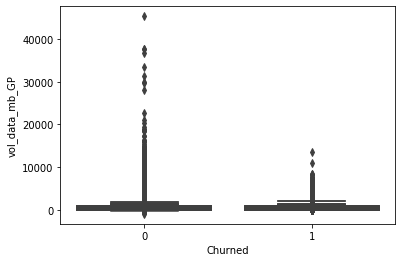

In [602]:
#get a list of outliers
"""
outliers_columns = []

for col in list(df_high_val_cust.columns):
    if col not in ['mobile_number']:
        print('Check outliers for column: ',col)

        skewed_data =  check_outliers_2(df_high_val_cust[col])

        
        if len(skewed_data) > 0:
            print('outlier_data points:',len(skewed_data))
            sns.boxplot(x = df_high_val_cust.Churned, y = df_high_val_cust[col])
            outliers_columns.append(col)
    
    
print('outliers_columns: ',len(outliers_columns))
"""

In [603]:
#remove outliers
Q1 = df_high_val_cust.quantile(0.01)
Q3 = df_high_val_cust.quantile(0.99)
IQR = Q3 - Q1
df_high_val_cust_removed_outliers_df = df_high_val_cust[~(df_high_val_cust > (Q3 + 1.5 * IQR)).any(axis=1)]
print(df_high_val_cust.shape)
print(df_high_val_cust_removed_outliers_df.shape)

(29979, 73)
(28514, 73)


In [0]:
df_high_val_cust = df_high_val_cust_removed_outliers_df.copy()

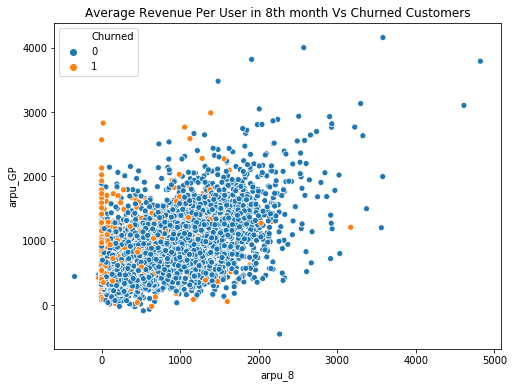

In [605]:
plt.figure(figsize=(8,6))
plt.title('Average Revenue Per User in 8th month Vs Churned Customers')
sns.scatterplot(x=df_high_val_cust.arpu_8,y=df_high_val_cust.arpu_GP,hue=df_high_val_cust['Churned'])
plt.show()

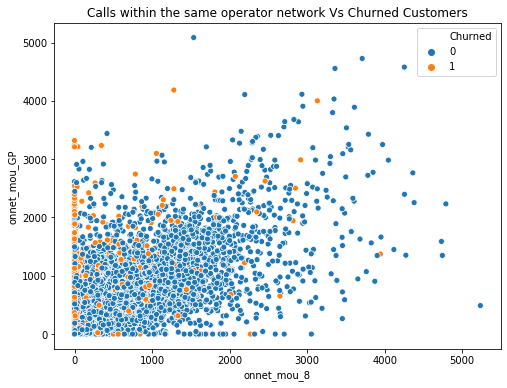

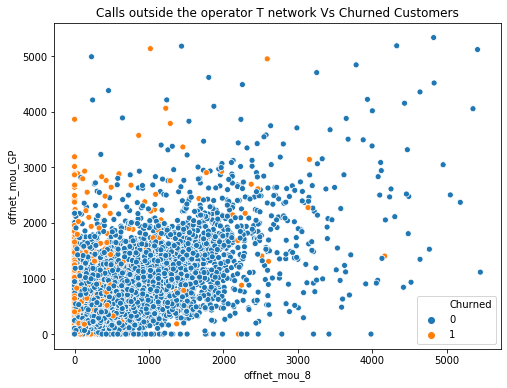

In [606]:
plt.figure(figsize=(8,6))
plt.title('Calls within the same operator network Vs Churned Customers')
sns.scatterplot(x=df_high_val_cust.onnet_mou_8,y=df_high_val_cust.onnet_mou_GP,hue=df_high_val_cust['Churned'])
plt.show()

plt.figure(figsize=(8,6))
plt.title('Calls outside the operator T network Vs Churned Customers')
sns.scatterplot(x=df_high_val_cust.offnet_mou_8,y=df_high_val_cust.offnet_mou_GP,hue=df_high_val_cust['Churned'])
plt.show()

<a id='Imbalance'></a>
## Handling Data Imbalance and splitting Train/Test Data

Distribution of values in column : Data_Recharge_GP


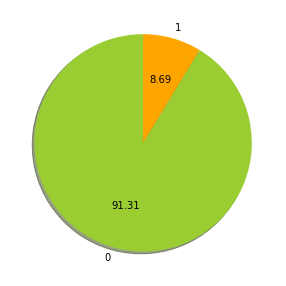

In [609]:
#lets check the dataimbalance

colors = ['yellowgreen','Orange']
plt.figure(figsize=(5, 5))
print(color.BOLD+ color.RED+'Distribution of values in column : {}'.format(col)+ color.END)
plt.pie(df_high_val_cust["Churned"].value_counts(), colors=colors, 
        shadow=True, startangle=90,autopct = '%1.2f',
        labels = list(df_high_val_cust["Churned"].value_counts().index))
plt.show()

**As the data is quite imbalanced, we need to apply imbalance handling technique**

In [0]:
#Lets Create X,y datasets for Dependent and independent variables
X = df_high_val_cust.iloc[:, df_high_val_cust.columns != 'Churned' ].copy()
y =  df_high_val_cust['Churned' ]

In [0]:
#Create list of the columns from the dataset
X_columns = X.columns.tolist()

#Before applying PCA, we need to standardise the data as in PCA we are going to project the data on the eigenvectors of the covariance matrix and 
#if data is of different range then this will case eigenvectors to be of different length which in turn will result n streched eigenspace of covariance matrix . 
#X_scaler = preprocessing.StandardScaler().fit(X.astype('float64'))
#X= X_scaler.transform(X.astype('float64'))  


scaler = StandardScaler()

X[X_columns] = scaler.fit_transform(X[X_columns])

#X_train.head()

In [0]:
#Split Data in training and Testing datasets
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size = 0.3, random_state = 100)

In [0]:
#make column list
X_columns = X_train.columns.tolist()

<a id='PCA'></a>
## PCA for feature selection

In [0]:
#Importing the PCA module and we will use svd_solver='randomized'in the PCA model building
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [615]:
#Fit PCA  model on our dataset
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [616]:
#lets check the PC1 and PC2
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':X_columns})
pcs_df.head()

,PC1,PC2,Feature
0,0.116805,0.264423,arpu_8
1,-0.032942,0.197677,onnet_mou_8
2,0.000020,0.240373,offnet_mou_8
3,0.011199,0.023372,roam_ic_mou_8
4,0.004006,0.041862,roam_og_mou_8


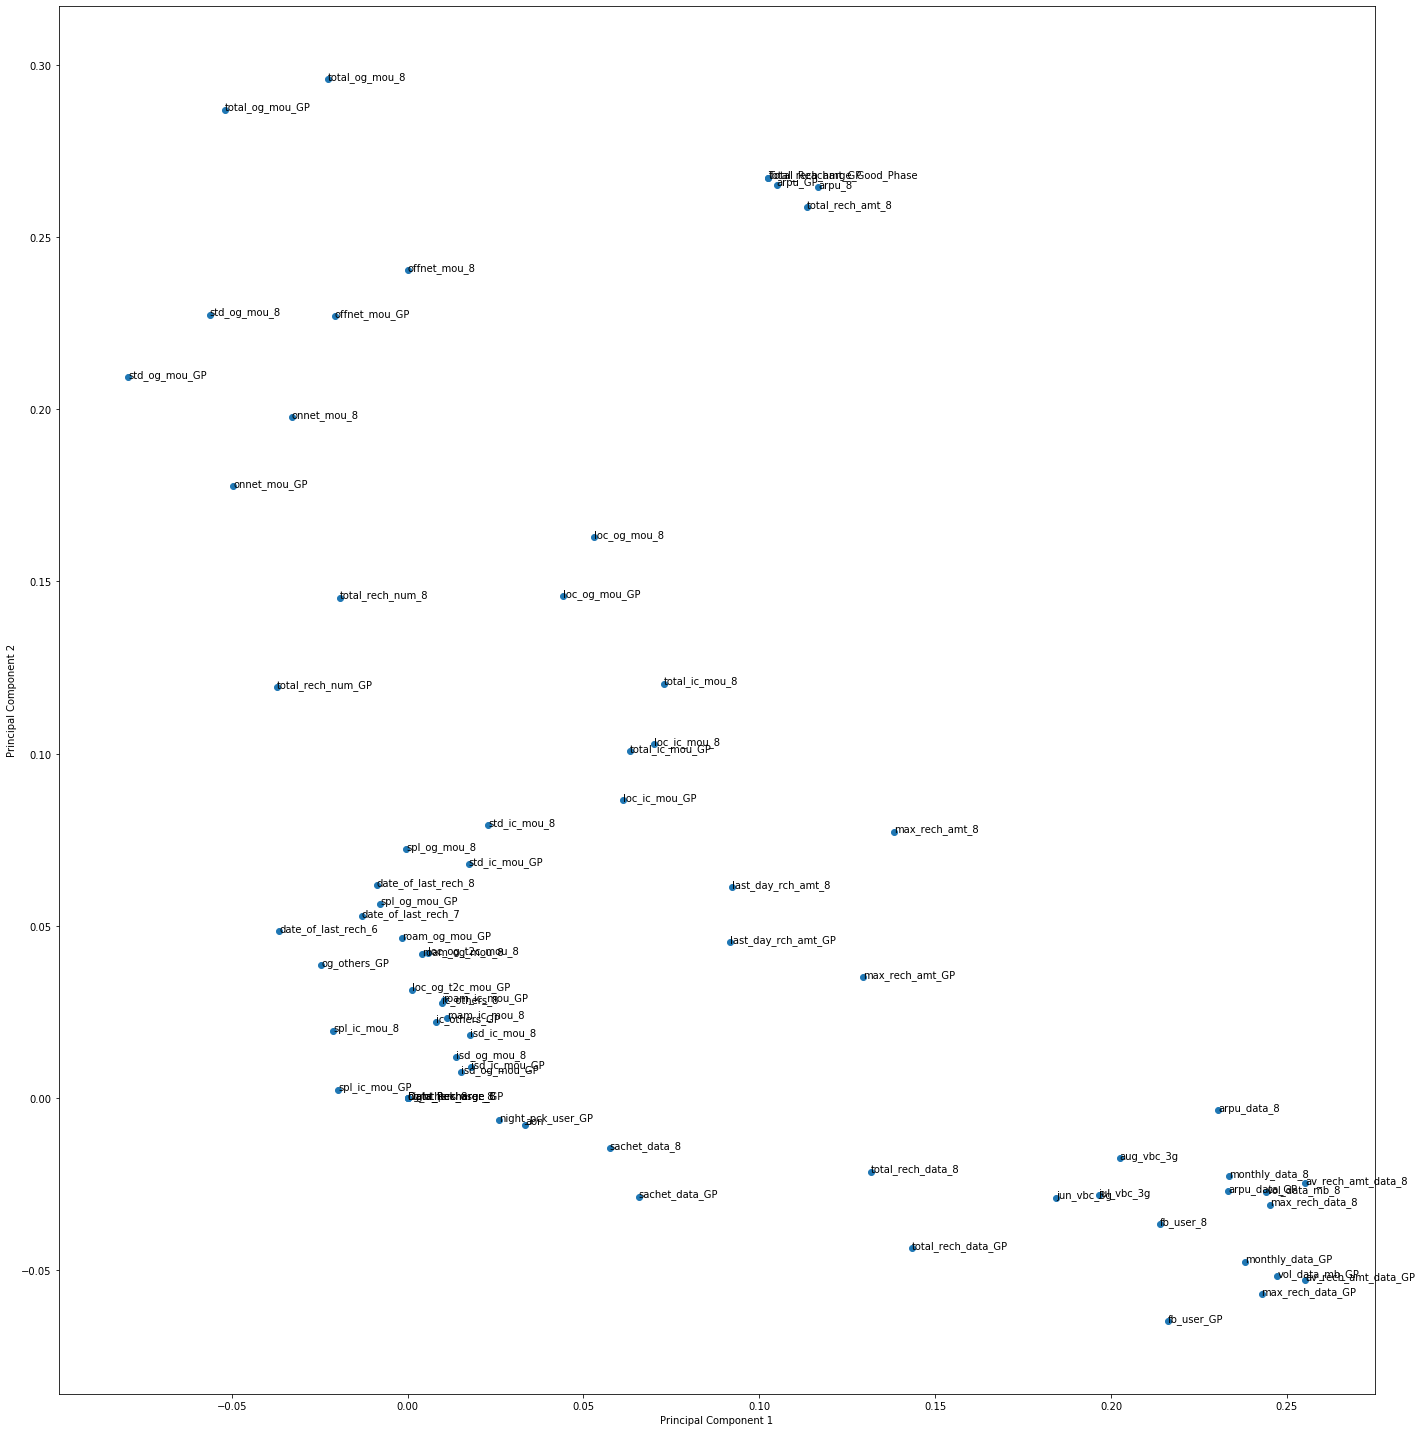

In [617]:
%matplotlib inline
fig = plt.figure(figsize = (20,20))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [618]:
#lets find out how many parameters descrive more than 90% variance
sum_component = 0
for i,j in enumerate(pca.explained_variance_ratio_):
  sum_component += j
  print(str(i)+" : "+str(sum_component))

0 : 0.16610112139339253
1 : 0.28373782672183445
2 : 0.3539311265850379
3 : 0.4112147273599487
4 : 0.4501938545696707
5 : 0.4838704378401994
6 : 0.5164170377227313
7 : 0.5472367180584884
8 : 0.5771559728566825
9 : 0.6034625151823975
10 : 0.6284583558679048
11 : 0.649911590200925
12 : 0.6701233771619199
13 : 0.6880661841021857
14 : 0.7046857149375231
15 : 0.7204094233226622
16 : 0.7357097612872096
17 : 0.7506488233885575
18 : 0.76511146565031
19 : 0.7791791298447561
20 : 0.7929894725730204
21 : 0.8063613480169316
22 : 0.8192102725662848
23 : 0.8313218738882757
24 : 0.8431103438848139
25 : 0.8548621540930476
26 : 0.8661149345184684
27 : 0.8761187440118436
28 : 0.886078557911738
29 : 0.8955142072688276
30 : 0.9038032248787109
31 : 0.9118143072614323
32 : 0.9188930790972109
33 : 0.9256591358312571
34 : 0.9316247766084435
35 : 0.9372245347217234
36 : 0.942645306211607
37 : 0.9477880957616125
38 : 0.9524551654469664
39 : 0.9567173372634341
40 : 0.9607340570250125
41 : 0.9646021003493923
42 : 

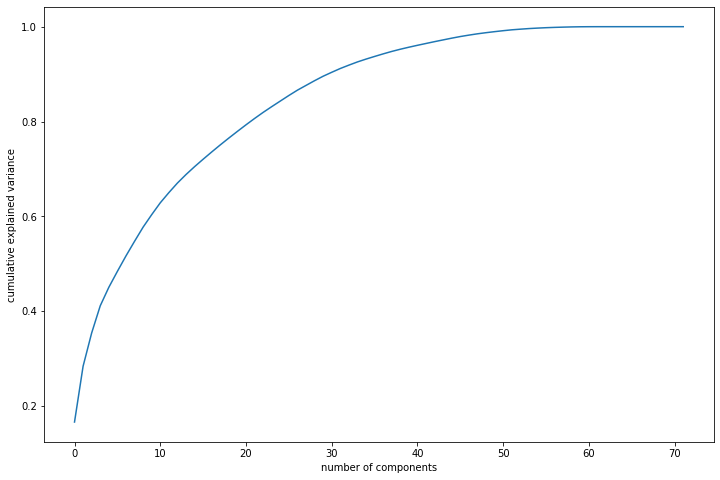

In [619]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [0]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
#As 40 componenets describe more than 96% variance we will use 40 compoenents
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [621]:
#Fit and transform the Dataset into our PCA model
df_pca = pca_final.fit_transform(X)
df_pca.shape

(28514, 50)

In [0]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [0]:
#pca_df = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3], '': y})
#pca_df = pd.DataFrame

In [0]:
dict = {}
for i in range(40):
  dict['PC'+str(i+1)]= pc[i]

pca_df = pd.DataFrame(dict)

In [0]:
#Lets Create X,y datasets for Dependent and independent variables
X_pca = pca_df
y_pca =  df_high_val_cust['Churned' ]

In [0]:
X_columns_pca = X_pca.columns.tolist()

**I have run all models after PCA and SMOTE for data imbalance handling.
The results are as below.**

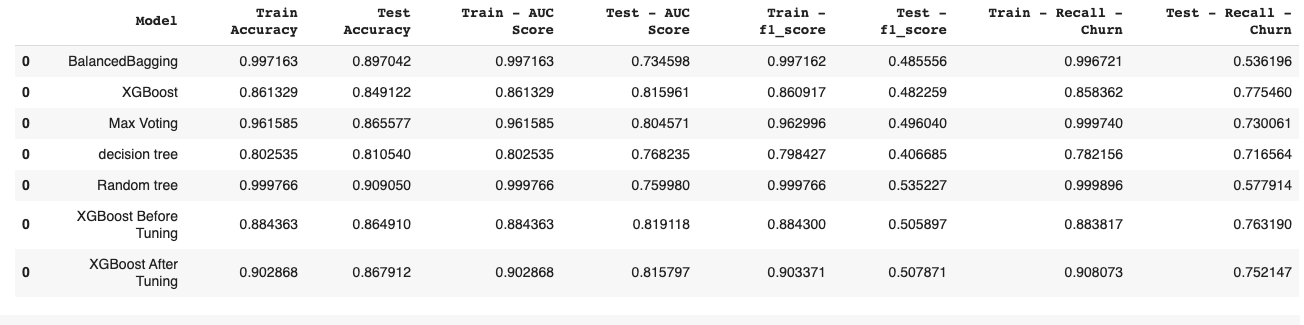


**As results are not better than the one without PCA,I will not proceed with PCA approach**


In [0]:
#Split Data in training and Testing datasets
#X_train, X_test, y_train, y_test = train_test_split(  X_pca, y_pca, test_size = 0.3, random_state = 100)

## Data imbalnce handling with SMOTE

In [0]:
#create a SMOTE object
sm = SMOTE(random_state = 2) 
#Create training  data after applying SMOTE 
X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 
X_test  = X_test.to_numpy()

In [629]:
#lets check data after we handled data imbalance using SMOTE

print(color.BOLD+ color.RED+'No of churned records after applying SMOTE : {}'.format(sum(y_train == 1))+ color.END)
print(color.BOLD+ color.RED+'No of non churned records after applying SMOTE : {}'.format(sum(y_train == 0))+ color.END)


No of churned records after applying SMOTE : 18247
No of non churned records after applying SMOTE : 18247


<a id='Implement'></a>
## Implementing Models

As we have now did EDA and handled missing values and data imbalance.
Now its time that we compare performance of different models on your dataset before we choose one which performes better.

<a id='Bag'></a>
## Bagging Model
In this model we will user decisiontree classifer with default values
and check the results

In [0]:
#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=100)

#Train the balanced bagging classifier.
bbc.fit(X_train, y_train)

#Get Predictions on Training data
y_Bagg_train_pred = bbc.predict(X_train)

In [631]:
#Lets print the classification report for Training data
print(classification_report( y_train,y_Bagg_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18247
           1       1.00      1.00      1.00     18247

    accuracy                           1.00     36494
   macro avg       1.00      1.00      1.00     36494
weighted avg       1.00      1.00      1.00     36494



In [632]:
#Predict the test churn data
Y_pred_bagg_test = bbc.predict(X_test)

#Lets print the classification report for test data
print(classification_report(y_test, Y_pred_bagg_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7790
           1       0.55      0.67      0.60       765

    accuracy                           0.92      8555
   macro avg       0.76      0.81      0.78      8555
weighted avg       0.93      0.92      0.92      8555



In [0]:
#create a empyt dataframe to store results of all model which we generate
df_results = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train - AUC Score',
                                   'Test - AUC Score','Train - f1_score','Test -f1_score','Train - Recall -Churn',
                                   'Test - Recall -Churn'
 ])



In [0]:
#create a function which we can call to store results
def add_results(df_results, model,y_train, y_train_predict,y_test, y_test_predict):


  report_train = classification_report(y_train, y_train_predict, output_dict=True )
  Train_Accuracy = metrics.accuracy_score(y_train, y_train_predict)
  Train_AUC_Score = metrics.roc_auc_score(y_train, y_train_predict)
  Train_f1_score = metrics.f1_score(y_train, y_train_predict)
  Train_Recall_Churn = report_train['1']['recall']

  report_test = classification_report(y_test, y_test_predict, output_dict=True )
  Test_Accuracy = metrics.accuracy_score(y_test, y_test_predict)
  Test_AUC_Score = metrics.roc_auc_score(y_test, y_test_predict)
  Test_f1_score = metrics.f1_score(y_test, y_test_predict)
  Test_Recall_Churn = report_test['1']['recall']
  return df_results.append([{ 'Model': model, 'Train Accuracy':Train_Accuracy, 
                                   'Test Accuracy':Test_Accuracy,
                                   'Train - AUC Score':Train_AUC_Score,
                                   'Test - AUC Score': Test_AUC_Score,
                                   'Train - f1_score': Train_f1_score,
                                   'Test -f1_score' : Test_f1_score,
                                   'Train - Recall -Churn':Train_Recall_Churn,
                                   'Test - Recall -Churn':Test_Recall_Churn }])
  #print(df_results)






In [635]:
#append the results
df_results = add_results(df_results,"BalancedBagging",y_train, y_Bagg_train_pred,y_test, Y_pred_bagg_test)

#print the results
df_results

,Model,Train Accuracy,Test Accuracy,Train - AUC Score,Test - AUC Score,Train - f1_score,Test -f1_score,Train - Recall -Churn,Test - Recall -Churn
0,BalancedBagging,0.998,0.921099,0.998,0.808144,0.998,0.603175,0.997972,0.670588


<a id='BagTune'></a>
## BalancedBagging with parameter tunning

In [636]:
#below code is used for finding tuning parameters for BalancedBagging Model.
#Please uncomment it for finidng tuning parameters
"""
param_grid = {
    'base_estimator__max_depth' : range(1,6,2),
    'max_samples' : [ 0.1, 0.2, 0.5,1.0],
    'n_estimators':  range(20,90,30)
}

Grid_balanceBagging = GridSearchCV(BalancedBaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 80, max_features = 0.5),
                                      param_grid, scoring = 'recall')
Grid_balanceBagging.fit(X_train, y_train.ravel())
y_train_Predict_BB = Grid_balanceBagging.predict(X_train)

print("Best Score: %.4g"% Grid_balanceBagging.best_score_)
print("Best n_estimators: %.4g"% Grid_balanceBagging.best_params_['n_estimators'])
print("Best max_samples: %.4g"% Grid_balanceBagging.best_params_['max_samples'])
print("Best base_estimator__max_depth: %.4g"% Grid_balanceBagging.best_params_['base_estimator__max_depth'])
means = Grid_balanceBagging.cv_results_['mean_test_score']
stds = Grid_balanceBagging.cv_results_['std_test_score']
params = Grid_balanceBagging.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param)) 
    
"""

'\nparam_grid = {\n    \'base_estimator__max_depth\' : range(1,6,2),\n    \'max_samples\' : [ 0.1, 0.2, 0.5,1.0],\n    \'n_estimators\':  range(20,90,30)\n}\n\nGrid_balanceBagging = GridSearchCV(BalancedBaggingClassifier(DecisionTreeClassifier(),\n                                     n_estimators = 80, max_features = 0.5),\n                                      param_grid, scoring = \'recall\')\nGrid_balanceBagging.fit(X_train, y_train.ravel())\ny_train_Predict_BB = Grid_balanceBagging.predict(X_train)\n\nprint("Best Score: %.4g"% Grid_balanceBagging.best_score_)\nprint("Best n_estimators: %.4g"% Grid_balanceBagging.best_params_[\'n_estimators\'])\nprint("Best max_samples: %.4g"% Grid_balanceBagging.best_params_[\'max_samples\'])\nprint("Best base_estimator__max_depth: %.4g"% Grid_balanceBagging.best_params_[\'base_estimator__max_depth\'])\nmeans = Grid_balanceBagging.cv_results_[\'mean_test_score\']\nstds = Grid_balanceBagging.cv_results_[\'std_test_score\']\nparams = Grid_balanceBagg

In [0]:
#lets run the model with the tunned parameters
bbc_parameter = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 5),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=100,
                                n_estimators = 80,
                                max_samples = 1.0
                                )
bbc_parameter.fit(X_train, y_train)
y_train_Predict_BB = bbc_parameter.predict(X_train)

In [638]:
y_test_Predict_BB = bbc_parameter.predict(X_test)

print("\n Test Model Report ")
print(" Test Accuracy : %.4g" % metrics.accuracy_score(y_test, y_test_Predict_BB))
print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_test_Predict_BB))
print(classification_report(y_test, y_test_Predict_BB))
print("r2 Score : %.4g" % metrics.r2_score(y_test, y_test_Predict_BB))


 Test Model Report 
 Test Accuracy : 0.8727
AUC Score (Test): 0.842870
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7790
           1       0.40      0.81      0.53       765

    accuracy                           0.87      8555
   macro avg       0.69      0.84      0.73      8555
weighted avg       0.93      0.87      0.89      8555

r2 Score : -0.5633


In [639]:
#append the results
df_results = add_results(df_results,"BalancedBagging with parameter tuning",y_train, y_train_Predict_BB,y_test, y_test_Predict_BB)

#print the results
df_results

,Model,Train Accuracy,Test Accuracy,Train - AUC Score,Test - AUC Score,Train - f1_score,Test -f1_score,Train - Recall -Churn,Test - Recall -Churn
0,BalancedBagging,0.998000,0.921099,0.998000,0.808144,0.998000,0.603175,0.997972,0.670588
0,BalancedBagging with parameter tuning,0.900641,0.872706,0.900641,0.842870,0.901942,0.531210,0.913904,0.806536


In [712]:
#Lets Get Feature Importance

Balanced_features = pd.DataFrame(sorted(zip(X.columns, (np.mean([est.steps[1][1].feature_importances_ for est in  bbc_parameter.estimators_], axis=0))), key = lambda x: x[1], reverse=True),index = None, columns = ['Feature','Importance'])

Balanced_features.head(20)

,Feature,Importance
0,total_ic_mou_8,0.541309
1,roam_og_mou_8,0.203721
2,total_rech_amt_8,0.071432
3,last_day_rch_amt_8,0.053424
4,date_of_last_rech_8,0.030000
5,total_rech_num_GP,0.018937
6,roam_ic_mou_8,0.015568
7,fb_user_8,0.012001
8,max_rech_amt_8,0.009519
9,total_rech_data_8,0.009362


<a id='Vote'></a>
## Ensamble Voting Model

We will create max voting model with 
DecisionTreeClassifier
KNeighborsClassifier
LogisticRegression

The prediction of from the model would be based on max votes for each prediction.

In [640]:
model_1 = DecisionTreeClassifier()
model_2 = KNeighborsClassifier()
model_3= LogisticRegression()

model_1.fit(X_train,y_train)
model_2.fit(X_train,y_train)
model_3.fit(X_train,y_train)

Train_pred_1 = model_1.predict(X_train)
Train_pred_2 = model_2.predict(X_train)
Train_pred_3 =  model_3.predict(X_train)

final_Train_pred = np.array([])
for i in range(0,len(X_train)):
    final_Train_pred = np.append(final_Train_pred, statistics.mode([Train_pred_1[i], Train_pred_2[i], Train_pred_3[i]]))

Test_pred_1 = model_1.predict(X_test)
Test_pred_2 = model_2.predict(X_test)
Test_pred_3 = model_3.predict(X_test)

final_test_pred = np.array([])
for i in range(0,len(X_test)):
    final_test_pred = np.append(final_test_pred, statistics.mode([Test_pred_1[i], Test_pred_2[i], Test_pred_3[i]]))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [641]:
print(classification_report(y_train, final_Train_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     18247
           1       0.93      1.00      0.96     18247

    accuracy                           0.96     36494
   macro avg       0.97      0.96      0.96     36494
weighted avg       0.97      0.96      0.96     36494



In [642]:
print(classification_report(y_test, final_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      7790
           1       0.41      0.78      0.53       765

    accuracy                           0.88      8555
   macro avg       0.69      0.83      0.73      8555
weighted avg       0.92      0.88      0.89      8555



In [643]:
#append the max voting model results

df_results = add_results(df_results,"Max Voting",y_train, final_Train_pred,y_test, final_test_pred)
#print all results till now

df_results

,Model,Train Accuracy,Test Accuracy,Train - AUC Score,Test - AUC Score,Train - f1_score,Test -f1_score,Train - Recall -Churn,Test - Recall -Churn
0,BalancedBagging,0.998000,0.921099,0.998000,0.808144,0.998000,0.603175,0.997972,0.670588
0,BalancedBagging with parameter tuning,0.900641,0.872706,0.900641,0.842870,0.901942,0.531210,0.913904,0.806536
0,Max Voting,0.962953,0.878200,0.962953,0.831741,0.964265,0.532316,0.999671,0.775163


<a id='DecTree'></a>
## Decision Tree

In [0]:
#lets create a decision tree classifier object
dec_tree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5) 

In [645]:
#Lets fit the decision tree model with training dataset
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [646]:
#Lets predict with the Test dataset
y_train_pred_dec_tree = dec_tree.predict(X_train)
#print the classification_report for train data
print(classification_report(y_train, y_train_pred_dec_tree))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90     18247
           1       0.89      0.91      0.90     18247

    accuracy                           0.90     36494
   macro avg       0.90      0.90      0.90     36494
weighted avg       0.90      0.90      0.90     36494



In [647]:
#Lets predict with the Test dataset
y_pred_test_dec_tree = dec_tree.predict(X_test)

#print the classification_report for test data
print(classification_report(y_test, y_pred_test_dec_tree))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      7790
           1       0.39      0.80      0.52       765

    accuracy                           0.87      8555
   macro avg       0.68      0.84      0.72      8555
weighted avg       0.93      0.87      0.89      8555



In [648]:
#append the decision tree model results

df_results = add_results(df_results,"decision tree",y_train, y_train_pred_dec_tree, y_test, y_pred_test_dec_tree)
#print all results till now

df_results

,Model,Train Accuracy,Test Accuracy,Train - AUC Score,Test - AUC Score,Train - f1_score,Test -f1_score,Train - Recall -Churn,Test - Recall -Churn
0,BalancedBagging,0.998000,0.921099,0.998000,0.808144,0.998000,0.603175,0.997972,0.670588
0,BalancedBagging with parameter tuning,0.900641,0.872706,0.900641,0.842870,0.901942,0.531210,0.913904,0.806536
0,Max Voting,0.962953,0.878200,0.962953,0.831741,0.964265,0.532316,0.999671,0.775163
0,decision tree,0.897709,0.869550,0.897709,0.839958,0.899045,0.524297,0.910944,0.803922


In [707]:
#Lets Get Feature Importance

Dec_tree_features = pd.DataFrame(sorted(zip(X.columns, dec_tree.feature_importances_), key = lambda x: x[1], reverse=True),index = None, columns = ['Feature','Importance'])

Dec_tree_features.head(20)

,Feature,Importance
0,total_ic_mou_8,0.541879
1,roam_og_mou_8,0.206641
2,total_rech_amt_8,0.075928
3,last_day_rch_amt_8,0.048071
4,date_of_last_rech_8,0.044279
5,total_rech_num_GP,0.020376
6,roam_ic_mou_8,0.012437
7,fb_user_8,0.010267
8,max_rech_amt_8,0.008222
9,roam_og_mou_GP,0.006543


<a id='RF'></a>
## Random Forest

In [0]:
#lets create a decision tree classifier object
RF_Class = RandomForestClassifier(n_estimators=25 ) 

In [650]:
#Lets fit the decision tree model with training dataset
RF_Class.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [651]:
#Lets predict with the Test dataset
y_train_pred_RF = RF_Class.predict(X_train)
#print the classification_report for train data
print(classification_report(y_train, y_train_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18247
           1       1.00      1.00      1.00     18247

    accuracy                           1.00     36494
   macro avg       1.00      1.00      1.00     36494
weighted avg       1.00      1.00      1.00     36494



In [652]:
#Lets predict with the Test dataset
y_test_pred_RF = RF_Class.predict(X_test)

#print the classification_report for test data
print(classification_report(y_test, y_test_pred_RF))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      7790
           1       0.56      0.71      0.62       765

    accuracy                           0.92      8555
   macro avg       0.76      0.83      0.79      8555
weighted avg       0.93      0.92      0.93      8555



In [653]:
#append the decision tree model results

df_results = add_results(df_results,"Random tree",y_train, y_train_pred_RF, y_test, y_test_pred_RF)
#print all results till now

df_results

,Model,Train Accuracy,Test Accuracy,Train - AUC Score,Test - AUC Score,Train - f1_score,Test -f1_score,Train - Recall -Churn,Test - Recall -Churn
0,BalancedBagging,0.998000,0.921099,0.998000,0.808144,0.998000,0.603175,0.997972,0.670588
0,BalancedBagging with parameter tuning,0.900641,0.872706,0.900641,0.842870,0.901942,0.531210,0.913904,0.806536
0,Max Voting,0.962953,0.878200,0.962953,0.831741,0.964265,0.532316,0.999671,0.775163
0,decision tree,0.897709,0.869550,0.897709,0.839958,0.899045,0.524297,0.910944,0.803922
0,Random tree,0.999534,0.923437,0.999534,0.825342,0.999534,0.622478,0.999945,0.705882


<a id='XG'></a>
## XGBoost Model
In this model we will user decisiontree classifer with default values
and check the results

In [654]:
# fit XGboost model on the training data set
XGBoost_model = XGBClassifier()
XGBoost_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [655]:
# Lets make the predictions for test data on XGBoost Model
y_train_pred = XGBoost_model.predict(X_train)
XGBoost_predictions_train = [round(value) for value in y_train_pred]

#Lets print the classification report for Training data
print(classification_report( y_train, XGBoost_predictions_train))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     18247
           1       0.93      0.94      0.93     18247

    accuracy                           0.93     36494
   macro avg       0.93      0.93      0.93     36494
weighted avg       0.93      0.93      0.93     36494



In [0]:
# Lets make the predictions for test data on XGBoost Model
y_pred = XGBoost_model.predict(X_test)
XGBoost_predictions_test = [round(value) for value in y_pred]

In [657]:
# Lets evaluate predictions from the XGBoost Model
XGBoost_accuracy = accuracy_score(y_test, XGBoost_predictions_test)
print("XGBoost Accuracy: %.2f%%" % (XGBoost_accuracy * 100.0))

#Lets print the classification report for Training data
print(classification_report(y_test,XGBoost_predictions_test))

XGBoost Accuracy: 90.52%
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      7790
           1       0.48      0.78      0.59       765

    accuracy                           0.91      8555
   macro avg       0.73      0.85      0.77      8555
weighted avg       0.93      0.91      0.91      8555



In [658]:
#append the boosting results

df_results = add_results(df_results,"XGBoost",y_train, XGBoost_predictions_train,y_test, XGBoost_predictions_test)
#print all results till now

df_results

,Model,Train Accuracy,Test Accuracy,Train - AUC Score,Test - AUC Score,Train - f1_score,Test -f1_score,Train - Recall -Churn,Test - Recall -Churn
0,BalancedBagging,0.998000,0.921099,0.998000,0.808144,0.998000,0.603175,0.997972,0.670588
0,BalancedBagging with parameter tuning,0.900641,0.872706,0.900641,0.842870,0.901942,0.531210,0.913904,0.806536
0,Max Voting,0.962953,0.878200,0.962953,0.831741,0.964265,0.532316,0.999671,0.775163
0,decision tree,0.897709,0.869550,0.897709,0.839958,0.899045,0.524297,0.910944,0.803922
0,Random tree,0.999534,0.923437,0.999534,0.825342,0.999534,0.622478,0.999945,0.705882
0,XGBoost,0.933222,0.905202,0.933222,0.847746,0.933783,0.594703,0.941689,0.777778


<a id='XGtune'></a>
## XGBoost Parameter Tuning with GridSearchCV

In [0]:
#create train dataset

X_train = pd.DataFrame(X_train, columns = X_columns) 
y_train = pd.DataFrame(y_train, columns = ['Churned'])
train  = pd.concat([X_train, y_train], axis = 1)
X_test = pd.DataFrame(X_test, columns = X_columns) 


#train  = pd.concat([X_train, y_train], axis = 1)

In [0]:
def XGB_model_fit(model_name,df_results, XGB_algo, dtrain, predictors, TrainCV=True, total_cv_folds=5, No_of_early_stopping_rounds=50):
    
    if TrainCV:
        xgb_model_param = XGB_algo.get_xgb_params()
        xgtrain_dMatrix = xgb.DMatrix(dtrain[predictors].values, label=dtrain['Churned'].values)
        cvresult = xgb.cv(xgb_model_param, xgtrain_dMatrix,
                          num_boost_round=XGB_algo.get_params()['n_estimators'], 
                          nfold=total_cv_folds,
                          metrics='auc', 
                          early_stopping_rounds=No_of_early_stopping_rounds)
        XGB_algo.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the XGboost algorithm on the data
    XGB_algo.fit(dtrain[predictors], dtrain['Churned'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = XGB_algo.predict(dtrain[predictors])
    dtrain_predprob = XGB_algo.predict_proba(dtrain[predictors])[:,1]

    #Predict training set:
    dtest_predictions = XGB_algo.predict(X_test)
    dtest_predprob = XGB_algo.predict_proba(X_test)[:,1]
        
    #Let's Print model report:
    print("\n Training Model Report ")
    print(" Traing Accuracy : %.4g" % metrics.accuracy_score(dtrain['Churned'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Churned'], dtrain_predprob))
    print(classification_report(dtrain['Churned'].values, dtrain_predictions))
    print("r2 Score : %.4g" % metrics.r2_score(dtrain['Churned'], dtrain_predprob))

    print("\n Testing Model Report ")
    print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, dtest_predprob))
    print("r2 Score : %.4g" % metrics.r2_score(y_test, dtest_predprob))
    print(classification_report(y_test, dtest_predictions))

    #append the decision tree model results
    

    plt.figure(figsize=(15, 5))               
    feat_imp = pd.Series(XGB_algo.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title=' Feature Importance')
    plt.ylabel('Feature Importance Score')
    plt.show()

    print(feat_imp.head(20))

    return add_results(df_results,model_name,dtrain['Churned'].values, dtrain_predictions, y_test, dtest_predictions)


 Training Model Report 
 Traing Accuracy : 0.9443
AUC Score (Train): 0.985089
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     18247
           1       0.94      0.95      0.94     18247

    accuracy                           0.94     36494
   macro avg       0.94      0.94      0.94     36494
weighted avg       0.94      0.94      0.94     36494

r2 Score : 0.8219

 Testing Model Report 
AUC Score (Test): 0.928370
r2 Score : 0.1844
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      7790
           1       0.51      0.78      0.62       765

    accuracy                           0.91      8555
   macro avg       0.74      0.85      0.78      8555
weighted avg       0.94      0.91      0.92      8555



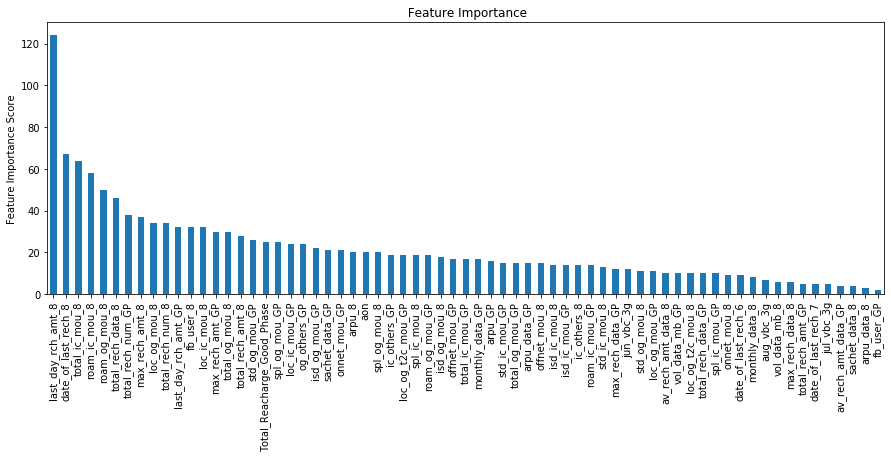

last_day_rch_amt_8            124
date_of_last_rech_8            67
total_ic_mou_8                 64
roam_ic_mou_8                  58
roam_og_mou_8                  50
total_rech_data_8              46
total_rech_num_GP              38
max_rech_amt_8                 37
loc_og_mou_8                   34
total_rech_num_8               34
last_day_rch_amt_GP            32
fb_user_8                      32
loc_ic_mou_8                   32
max_rech_amt_GP                30
total_og_mou_8                 30
total_rech_amt_8               28
std_og_mou_GP                  26
Total_Reacharge_Good_Phase     25
spl_og_mou_GP                  25
loc_ic_mou_GP                  24
dtype: int64


In [698]:
#Choose all predictors except Churned
from sklearn import metrics 
predictors = [x for x in train.columns if x not in ['Churned']]
xgb_model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=50,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=100)

#Fit the model with XGB classifier, Train data and the predictor veraible list
df_results = XGB_model_fit("XGBoost Before Tuning", df_results,xgb_model, train, predictors)

In [662]:
#print all results till now
df_results

,Model,Train Accuracy,Test Accuracy,Train - AUC Score,Test - AUC Score,Train - f1_score,Test -f1_score,Train - Recall -Churn,Test - Recall -Churn
0,BalancedBagging,0.998000,0.921099,0.998000,0.808144,0.998000,0.603175,0.997972,0.670588
0,BalancedBagging with parameter tuning,0.900641,0.872706,0.900641,0.842870,0.901942,0.531210,0.913904,0.806536
0,Max Voting,0.962953,0.878200,0.962953,0.831741,0.964265,0.532316,0.999671,0.775163
0,decision tree,0.897709,0.869550,0.897709,0.839958,0.899045,0.524297,0.910944,0.803922
0,Random tree,0.999534,0.923437,0.999534,0.825342,0.999534,0.622478,0.999945,0.705882
0,XGBoost,0.933222,0.905202,0.933222,0.847746,0.933783,0.594703,0.941689,0.777778
0,XGBoost Before Tuning,0.944347,0.913033,0.944347,0.854994,0.944892,0.617284,0.954239,0.784314


In [663]:
#below code is used for finding tuning parameters for XGBoosting Model.
#Please uncomment it for finidng tuning parameters
"""
XBG_param_test_1 = {
 'n_estimators': range(50,250,50)
}
Grid_search_1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=150, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=100), 
 param_grid = XBG_param_test_1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
Grid_search_1.fit(X_train,y_train)
print("Best Score: %.4g"% Grid_search_1.best_score_)
print("Best n_estimators: %.4g"% Grid_search_1.best_params_['n_estimators'])
means = Grid_search_1.cv_results_['mean_test_score']
stds = Grid_search_1.cv_results_['std_test_score']
params = Grid_search_1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
"""

'\nXBG_param_test_1 = {\n \'n_estimators\': range(50,250,50)\n}\nGrid_search_1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=150, max_depth=5,\n min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,\n objective= \'binary:logistic\', nthread=4, scale_pos_weight=1, seed=100), \n param_grid = XBG_param_test_1, scoring=\'roc_auc\',n_jobs=4,iid=False, cv=5)\nGrid_search_1.fit(X_train,y_train)\nprint("Best Score: %.4g"% Grid_search_1.best_score_)\nprint("Best n_estimators: %.4g"% Grid_search_1.best_params_[\'n_estimators\'])\nmeans = Grid_search_1.cv_results_[\'mean_test_score\']\nstds = Grid_search_1.cv_results_[\'std_test_score\']\nparams = Grid_search_1.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n\tprint("%f (%f) with: %r" % (mean, stdev, param))\n'

In [664]:
#below code is used for finding tuning parameters for XGBoosting Model.
#Please uncomment it for finidng tuning parameters
"""
XBG_param_test_2 = {
  'max_depth':[3,5,7,9],
 'min_child_weight':[1,3,5]
 #'max_depth':[3,4,5],
 #'min_child_weight':[1,2,3]
}
Grid_search_2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=800, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=100), 
 param_grid = XBG_param_test_2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
Grid_search_2.fit(X_train,y_train)
Grid_search_2.cv_results_, Grid_search_2.best_params_, Grid_search_2.best_score_
print("Best Score: %.4g"% Grid_search_2.best_score_)
print("Best max_depth: %.4g"% Grid_search_2.best_params_['max_depth'])
print("Best min_child_weight: %.4g"%Grid_search_2.best_params_['min_child_weight'])
means = Grid_search_2.cv_results_['mean_test_score']
stds = Grid_search_2.cv_results_['std_test_score']
params = Grid_search_2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
"""

'\nXBG_param_test_2 = {\n  \'max_depth\':[3,5,7,9],\n \'min_child_weight\':[1,3,5]\n #\'max_depth\':[3,4,5],\n #\'min_child_weight\':[1,2,3]\n}\nGrid_search_2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=800, max_depth=3,\n min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,\n objective= \'binary:logistic\', nthread=4, scale_pos_weight=1, seed=100), \n param_grid = XBG_param_test_2, scoring=\'roc_auc\',n_jobs=4,iid=False, cv=5)\nGrid_search_2.fit(X_train,y_train)\nGrid_search_2.cv_results_, Grid_search_2.best_params_, Grid_search_2.best_score_\nprint("Best Score: %.4g"% Grid_search_2.best_score_)\nprint("Best max_depth: %.4g"% Grid_search_2.best_params_[\'max_depth\'])\nprint("Best min_child_weight: %.4g"%Grid_search_2.best_params_[\'min_child_weight\'])\nmeans = Grid_search_2.cv_results_[\'mean_test_score\']\nstds = Grid_search_2.cv_results_[\'std_test_score\']\nparams = Grid_search_2.cv_results_[\'params\']\nfor mean, stdev, param in zip(me

In [665]:
#below code is used for finding tuning parameters for XGBoosting Model.
#Please uncomment it for finidng tuning parameters
"""
XBG_param_test_3 = {
'gamma':[i/10.0 for i in range(0,5)]
}
Grid_search_3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=100), 
 param_grid = XBG_param_test_3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
Grid_search_3.fit(X_train,y_train)
Grid_search_3.cv_results_, Grid_search_3.best_params_, Grid_search_3.best_score_
print("Best Score: %.4g"% Grid_search_3.best_score_)
print("Best gamma: %.4g"% Grid_search_3.best_params_['gamma'])
#print("Best min_child_weight: %.4g"%Grid_search_3.best_params_['min_child_weight'])
means = Grid_search_3.cv_results_['mean_test_score']
stds = Grid_search_3.cv_results_['std_test_score']
params = Grid_search_3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
"""

'\nXBG_param_test_3 = {\n\'gamma\':[i/10.0 for i in range(0,5)]\n}\nGrid_search_3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,\n min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,\n objective= \'binary:logistic\', nthread=4, scale_pos_weight=1, seed=100), \n param_grid = XBG_param_test_3, scoring=\'roc_auc\',n_jobs=4,iid=False, cv=5)\nGrid_search_3.fit(X_train,y_train)\nGrid_search_3.cv_results_, Grid_search_3.best_params_, Grid_search_3.best_score_\nprint("Best Score: %.4g"% Grid_search_3.best_score_)\nprint("Best gamma: %.4g"% Grid_search_3.best_params_[\'gamma\'])\n#print("Best min_child_weight: %.4g"%Grid_search_3.best_params_[\'min_child_weight\'])\nmeans = Grid_search_3.cv_results_[\'mean_test_score\']\nstds = Grid_search_3.cv_results_[\'std_test_score\']\nparams = Grid_search_3.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n\tprint("%f (%f) with: %r" % (mean, stdev, param))\n    \n'

In [666]:
#below code is used for finding tuning parameters for XGBoosting Model.
#Please uncomment it for finidng tuning parameters
"""
XBG_param_test_3 = {
 'n_estimators': range(90,120,10),
 'max_depth':range(4,7),
 'min_child_weight':range(4,7),
 'gamma':[i/10.0 for i in range(1,4)]
}
Grid_search_4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=100), 
 param_grid = XBG_param_test_3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
Grid_search_4.fit(X_train,y_train)
print("Best Score: %.4g"% Grid_search_4.best_score_)
print("Best n_estimators: %.4g"% Grid_search_4.best_params_['n_estimators'])
print("Best max_depth: %.4g"% Grid_search_4.best_params_['max_depth'])
print("Best min_child_weight: %.4g"% Grid_search_4.best_params_['min_child_weight'])
print("Best gamma: %.4g"% Grid_search_4.best_params_['gamma'])
#print("Best min_child_weight: %.4g"%gsearch1.best_params_['min_child_weight'])
means = Grid_search_4.cv_results_['mean_test_score']
stds = Grid_search_4.cv_results_['std_test_score']
params = Grid_search_4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
"""

'\nXBG_param_test_3 = {\n \'n_estimators\': range(90,120,10),\n \'max_depth\':range(4,7),\n \'min_child_weight\':range(4,7),\n \'gamma\':[i/10.0 for i in range(1,4)]\n}\nGrid_search_4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,\n min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,\n objective= \'binary:logistic\', nthread=4, scale_pos_weight=1, seed=100), \n param_grid = XBG_param_test_3, scoring=\'roc_auc\',n_jobs=4,iid=False, cv=5)\nGrid_search_4.fit(X_train,y_train)\nprint("Best Score: %.4g"% Grid_search_4.best_score_)\nprint("Best n_estimators: %.4g"% Grid_search_4.best_params_[\'n_estimators\'])\nprint("Best max_depth: %.4g"% Grid_search_4.best_params_[\'max_depth\'])\nprint("Best min_child_weight: %.4g"% Grid_search_4.best_params_[\'min_child_weight\'])\nprint("Best gamma: %.4g"% Grid_search_4.best_params_[\'gamma\'])\n#print("Best min_child_weight: %.4g"%gsearch1.best_params_[\'min_child_weight\'])\nmeans = Grid_sear


 Training Model Report 
 Traing Accuracy : 0.9577
AUC Score (Train): 0.992389
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     18247
           1       0.95      0.97      0.96     18247

    accuracy                           0.96     36494
   macro avg       0.96      0.96      0.96     36494
weighted avg       0.96      0.96      0.96     36494

r2 Score : 0.8681

 Testing Model Report 
AUC Score (Test): 0.929767
r2 Score : 0.281
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      7790
           1       0.54      0.73      0.62       765

    accuracy                           0.92      8555
   macro avg       0.76      0.84      0.79      8555
weighted avg       0.93      0.92      0.93      8555



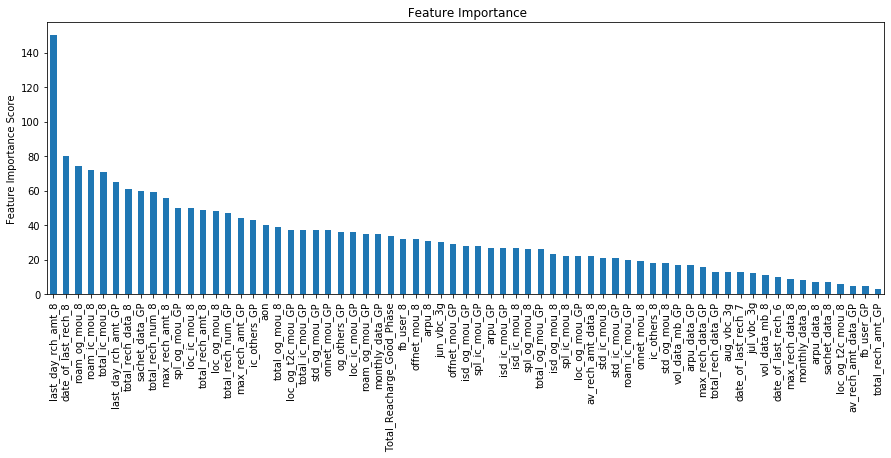

In [667]:
#Choose all predictors except Churned
xgb_model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=90,
 max_depth=5,
 min_child_weight=6,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=100)

#Fit the model with XGB classifier, Train data and the predictor veraible list
df_results = XGB_model_fit("XGBoost After Tuning", df_results,xgb_model, train, predictors)

[Overall Results](#OverallResults)

In [668]:
#print all results till now
df_results

,Model,Train Accuracy,Test Accuracy,Train - AUC Score,Test - AUC Score,Train - f1_score,Test -f1_score,Train - Recall -Churn,Test - Recall -Churn
0,BalancedBagging,0.998000,0.921099,0.998000,0.808144,0.998000,0.603175,0.997972,0.670588
0,BalancedBagging with parameter tuning,0.900641,0.872706,0.900641,0.842870,0.901942,0.531210,0.913904,0.806536
0,Max Voting,0.962953,0.878200,0.962953,0.831741,0.964265,0.532316,0.999671,0.775163
0,decision tree,0.897709,0.869550,0.897709,0.839958,0.899045,0.524297,0.910944,0.803922
0,Random tree,0.999534,0.923437,0.999534,0.825342,0.999534,0.622478,0.999945,0.705882
0,XGBoost,0.933222,0.905202,0.933222,0.847746,0.933783,0.594703,0.941689,0.777778
0,XGBoost Before Tuning,0.944347,0.913033,0.944347,0.854994,0.944892,0.617284,0.954239,0.784314
0,XGBoost After Tuning,0.957692,0.920397,0.957692,0.835461,0.958050,0.621877,0.966241,0.732026


<a id='FeatureSelection'></a>
## Feature  reduction using lasso

**Let's tune lasso model with wide range of alpha value** 

In [685]:
alphas = 10**np.linspace(6,-2,50)*0.5
alphas

array([5.00000000e+05, 3.43324423e+05, 2.35743318e+05, 1.61872877e+05,
       1.11149824e+05, 7.63208984e+04, 5.24056567e+04, 3.59842837e+04,
       2.47085668e+04, 1.69661089e+04, 1.16497591e+04, 7.99929360e+03,
       5.49270571e+03, 3.77156003e+03, 2.58973734e+03, 1.77824015e+03,
       1.22102655e+03, 8.38416468e+02, 5.75697700e+02, 3.95302161e+02,
       2.71433772e+02, 1.86379686e+02, 1.27977396e+02, 8.78755312e+01,
       6.03396320e+01, 4.14321386e+01, 2.84493301e+01, 1.95346997e+01,
       1.34134790e+01, 9.21034985e+00, 6.32427608e+00, 4.34255687e+00,
       2.98181166e+00, 2.04745753e+00, 1.40588435e+00, 9.65348864e-01,
       6.62855683e-01, 4.55149089e-01, 3.12527596e-01, 2.14596713e-01,
       1.47352585e-01, 1.01179482e-01, 6.94747747e-02, 4.77047738e-02,
       3.27564278e-02, 2.24921633e-02, 1.54442180e-02, 1.06047544e-02,
       7.28174239e-03, 5.00000000e-03])

In [687]:
#standardize the data and fit Lasso models for each value of alpha.
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
np.shape(coefs)

(50, 72)

In [690]:
# perform 10-fold  cross validation to choose the best hyper parameter alpha
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Alpha= 1.2307136330201915e-06


Lasso(alpha=1.2307136330201915e-06, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [694]:
# Men squared error and best model parameters 
print("mse = ",metrics.mean_squared_error(y_test, lasso.predict(X_test)))
print("best model coefficients:")
pd.Series(lasso.coef_, index=X.columns)

mse =  0.1498183266891418
best model coefficients:


arpu_8             -0.087629
onnet_mou_8        -0.000000
offnet_mou_8       -0.002896
roam_ic_mou_8       0.005165
roam_og_mou_8       0.034888
                      ...   
arpu_data_GP        0.043207
monthly_data_GP    -0.015343
sachet_data_GP      0.024970
vol_data_mb_GP      0.028966
Data_Recharge_GP    0.000000
Length: 72, dtype: float64

In [692]:
# create a dataframe for columns and it's coefficients
lasso_corff_df = pd.DataFrame(pd.Series(lasso.coef_, index=X.columns),columns = ['best_features'])
lasso_corff_df.columns

Index(['best_features'], dtype='object')

In [693]:
# filter highest coeficient features will be chosen as best features
lasso_corff_df_imp = lasso_corff_df[lasso_corff_df['best_features']>= 0.01]
lasso_corff_df_imp.head(20)

,best_features
roam_og_mou_8,0.034888
total_rech_amt_8,0.074239
av_rech_amt_data_8,0.021669
Total_Reacharge_Good_Phase,0.010021
arpu_data_8,0.028937
arpu_GP,0.026103
roam_ic_mou_GP,0.015068
total_og_mou_GP,0.061525
total_ic_mou_GP,0.215787
total_rech_num_GP,0.038338


<a id='Summary'></a>
## Summary

### Model Selection:

We built multiple models for evaluation and to check which one performs better and gives us better results.

The aim is to increase the recall value provided by each model so that, maximum churners are identified.

Below is list of models which we built:

  1. Bagging Model
   2. BalancedBagging with parameter tunning
   3. Ensamble voting Model
   4. Decision Tree Model
   5. Random Forest Model
   6. XGBoosting Model
   7. XGBoosting Model with Tuned Parameters


The results of our models are as below:  


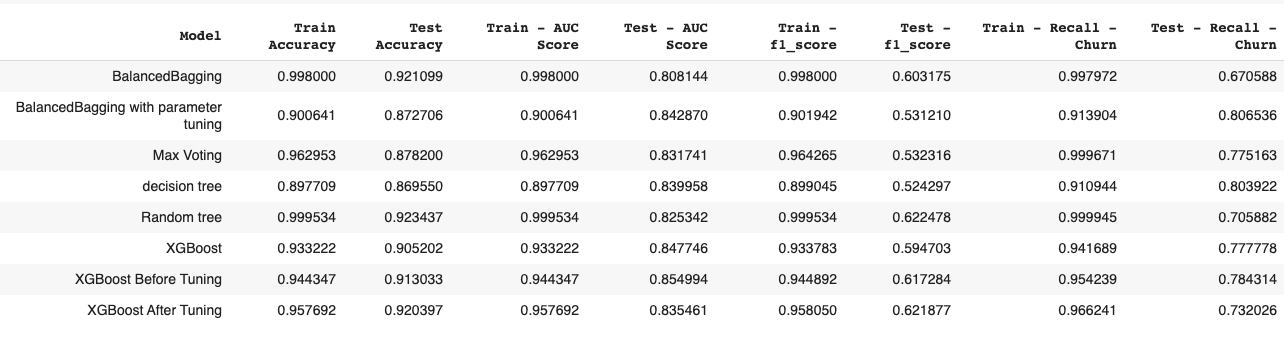


As the reulsts for Balanced Bagging with Tuned Parameter Model are much better with 
  - Recall value for Churners : 0.806536
  - Train Accuracy : 0.900641
  - Test Accuracy : 0.872706

The balanced Bagging model seems perfect for this dataset to get us good recall value.



### Parameter Selection

We performed PCA for feature reduction on our dataset. But results were not that better than original dataset. So we built and performed our models on full dataset after we reduced parameter.
For parameter reduction we perform parameter analysis and check variance as well as we created derived  features to eliminate unnecessary features.

We built a Lasso Regression method to derived the feature selection
the top 20 features selected by Lasso has below:

best_features

 - roam_og_mou_8	0.034888
 - total_rech_amt_8	0.074239
 - av_rech_amt_data_8	0.021669
 - Total_Reacharge_Good_Phase	0.010021
 - arpu_data_8	0.028937
 - arpu_GP	0.026103
 - roam_ic_mou_GP	0.015068
 - total_og_mou_GP	0.061525
 - total_ic_mou_GP	0.215787
 - total_rech_num_GP	0.038338
 - max_rech_amt_GP	0.035842
 - max_rech_data_GP	0.036180
 - fb_user_GP	0.018409
 - arpu_data_GP	0.043207
 - sachet_data_GP	0.024970
 - vol_data_mb_GP	0.02896

The feature selection provoded by our BalancedBagging Model are ase below:

 - total_ic_mou_8	0.541309
 - roam_og_mou_8	0.203721
 - total_rech_amt_8	0.071432
 - last_day_rch_amt_8	0.053424
 - date_of_last_rech_8	0.030000
 - total_rech_num_GP	0.018937
 - roam_ic_mou_8	0.015568
 - fb_user_8	0.012001
 - max_rech_amt_8	0.009519
 - total_rech_data_8	0.009362
 - arpu_8	0.007379
 - av_rech_amt_data_8	0.007170
 - roam_og_mou_GP	0.004761
 - total_og_mou_8	0.003511
 - roam_ic_mou_GP	0.003194
 - loc_og_mou_8	0.003078
 - std_ic_mou_GP	0.001863
 - total_ic_mou_GP	0.001799
 - sachet_data_GP	0.001162
 - ic_others_GP

if we compare both lists we can see that below features are quite important for churn analysis
1. Total incoming Minutes usage
2. Roaming outgoing usage
3. Total Recharge amount
4. Total no of recharges users do
5. date of month when user do the recharge